<a href="https://colab.research.google.com/github/rpasquini/econometria/blob/main/Sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Las referencias de las variables estan aqui:
https://github.com/rpasquini/econometria/blob/main/datos/datasets_wooldridge/SLEEP75_description.txt

In [6]:
columns=["age"     , "black"   , "case"    , "clerical", "construc", "educ"    , "earns74" , "gdhlth"  ,
"inlf"    , "leis1"   , "leis2"   , "leis3"   , "smsa"    , "lhrwage" , "lothinc" , "male"    ,
"marr"    , "prot"    , "rlxall"  , "selfe"   , "sleep"   , "slpnaps" , "south"   , "spsepay" ,
"spwrk75" , "totwrk"  , "union"   , "worknrm" , "workscnd", "exper"   , "yngkid"  , "yrsmarr" ,
"hrwage"  , "agesq"]

In [8]:
df=pd.read_excel('https://github.com/rpasquini/econometria/blob/main/datos/datasets_wooldridge/sleep75.xls?raw=true', header=None)


In [10]:
df.columns=columns

In [11]:
df.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.53,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.75,4096


In [12]:
def regress(lista, data):
  """
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  #datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  #datos=datos.dropna()
  Y=data[lista[0]]
  X=data[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X, missing='drop')
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [26]:
resultados=regress(["sleep", "totwrk", "educ", "age", "agesq", "yngkid", "male"], df)

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     16.30
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.28e-17
Time:                        16:10:17   Log-Likelihood:                -5259.3
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     699   BIC:                         1.056e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3840.8521    239.414     16.043      0.0

In [34]:
df['residuos']=resultados.resid
df['residuos2']=df['residuos']*df['residuos']


In [35]:
resultados2=regress(["residuos2", "male"], df)

                            OLS Regression Results                            
Dep. Variable:              residuos2   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.117
Date:                Mon, 06 May 2024   Prob (F-statistic):              0.291
Time:                        16:12:37   Log-Likelihood:                -10032.
No. Observations:                 706   AIC:                         2.007e+04
Df Residuals:                     704   BIC:                         2.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.894e+05   2.05e+04      9.216      0.0

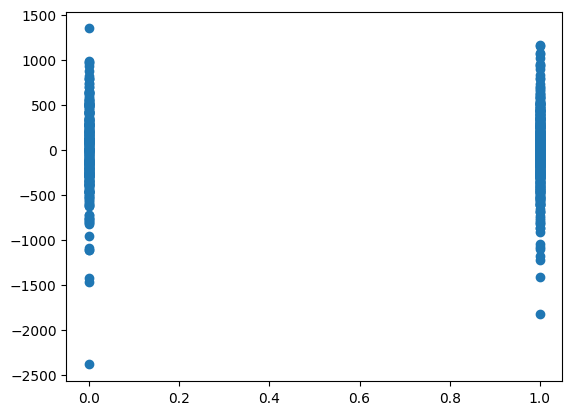

In [39]:
plt.scatter(df['male'],df['residuos'])